In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\hitan\OneDrive\Desktop\MiniProjects\ML_NMIMS Codes')

### PLOT 1

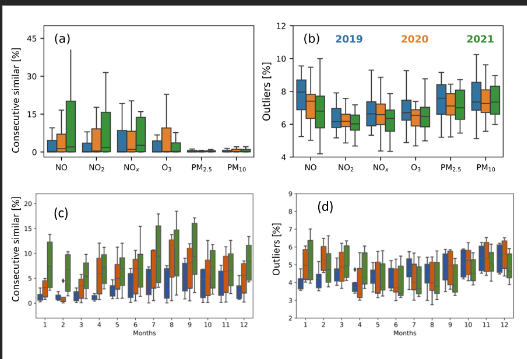 <br/> Reproduce this plot with new data

C:\Users\hitan\AppData\Local\Temp\ipykernel_21632\963972419.py:41: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_21632\963972419.py:65: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),


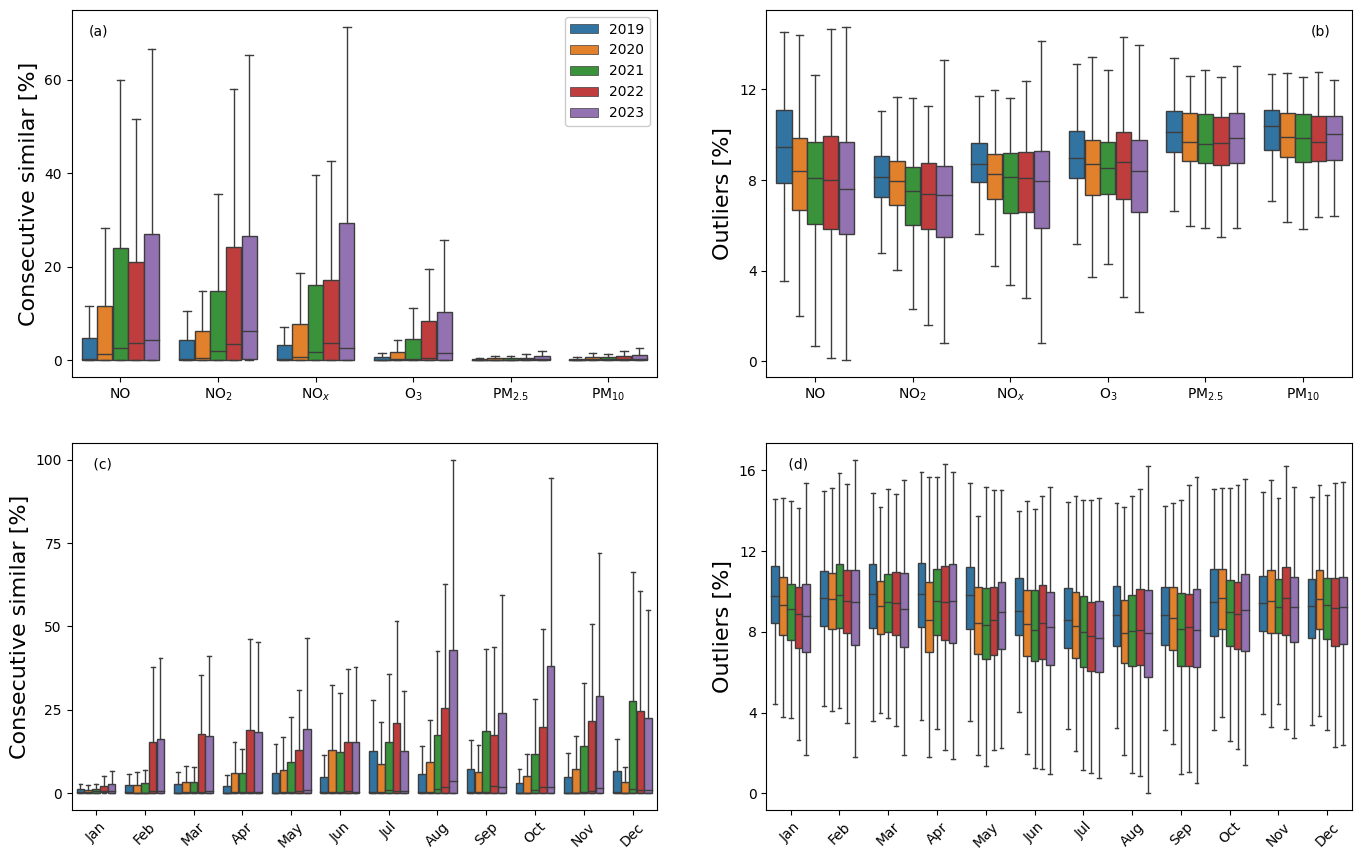

In [50]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16,10))

gs = fig.add_gridspec(2,8)

ax1 = fig.add_subplot(gs[0:1, 0:4])
ax2 = fig.add_subplot(gs[0:1, 4:8])
ax3 = fig.add_subplot(gs[1:2, 0:4])
ax4 = fig.add_subplot(gs[1:2, 4:8])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.2)


# ========================= Similars by Pollutants =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count_all.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100

per_df = t


melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_ylabel("Consecutive similar [%]", fontsize=16)
ax1.set_xlabel("Pollutants", fontsize=16)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Pollutants =========================

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_ylabel("Outliers [%]", fontsize=16)
ax2.set_xlabel("Pollutants", fontsize=16)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))



# ========================= Similars by Month =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\monthly_condensed.csv")
t = count_var.copy(deep=True)


lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
# Now, _consecutives and _outliers are in percentage of data missing/removed.

melt_df_1 = t.melt(id_vars=['month','year'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
# print(melt_df_1)
flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax3, 
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops )


# ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax3.set_ylabel("Consecutive similar [%]", fontsize=16)
ax3.set_xlabel("Month", fontsize=16)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Month =========================

melt_df_1 = t.melt(id_vars=['month','year'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])

flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax4,
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax4.set_ylabel("Outliers [%]", fontsize=16)
ax4.set_xlabel("Month", fontsize=16)
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= PLOT ALL =========================


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.18)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
# ax5.set_xlabel("")
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

#ax1.set_ylim([-2, 105])
# ax2.set_ylim([-2, 60])
# ax3.set_ylim([-85, 100])
# ax4.set_ylim([-60, 70])
# ax5.set_ylim([-50, 150])

plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,  backgroundcolor = 'white')
plt.text(.93, .96, '(b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'white')
plt.text(.03, .96, ' (c)', ha='left', va='top', transform=ax3.transAxes, backgroundcolor = 'white')
plt.text(.03, .96, ' (d)', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'white')

fig.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\bar_plot_4x4', dpi=1200, bbox_inches="tight")

plt.show()

### PLOT 2

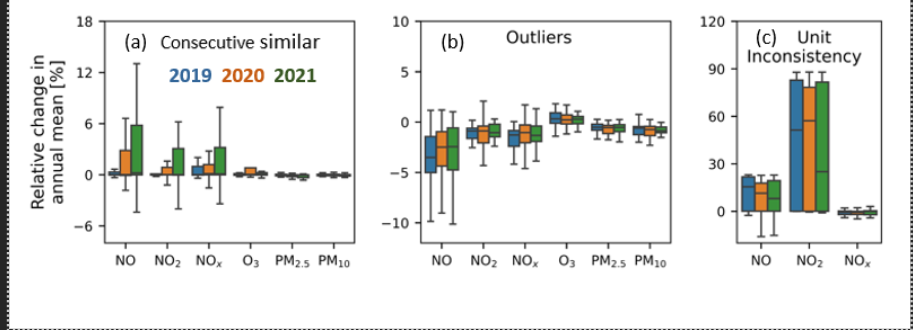

Reproduce this plot

In [3]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

C:\Users\hitan\AppData\Local\Temp\ipykernel_8676\1338621871.py:42: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_8676\1338621871.py:62: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_8676\1338621871.py:99: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),


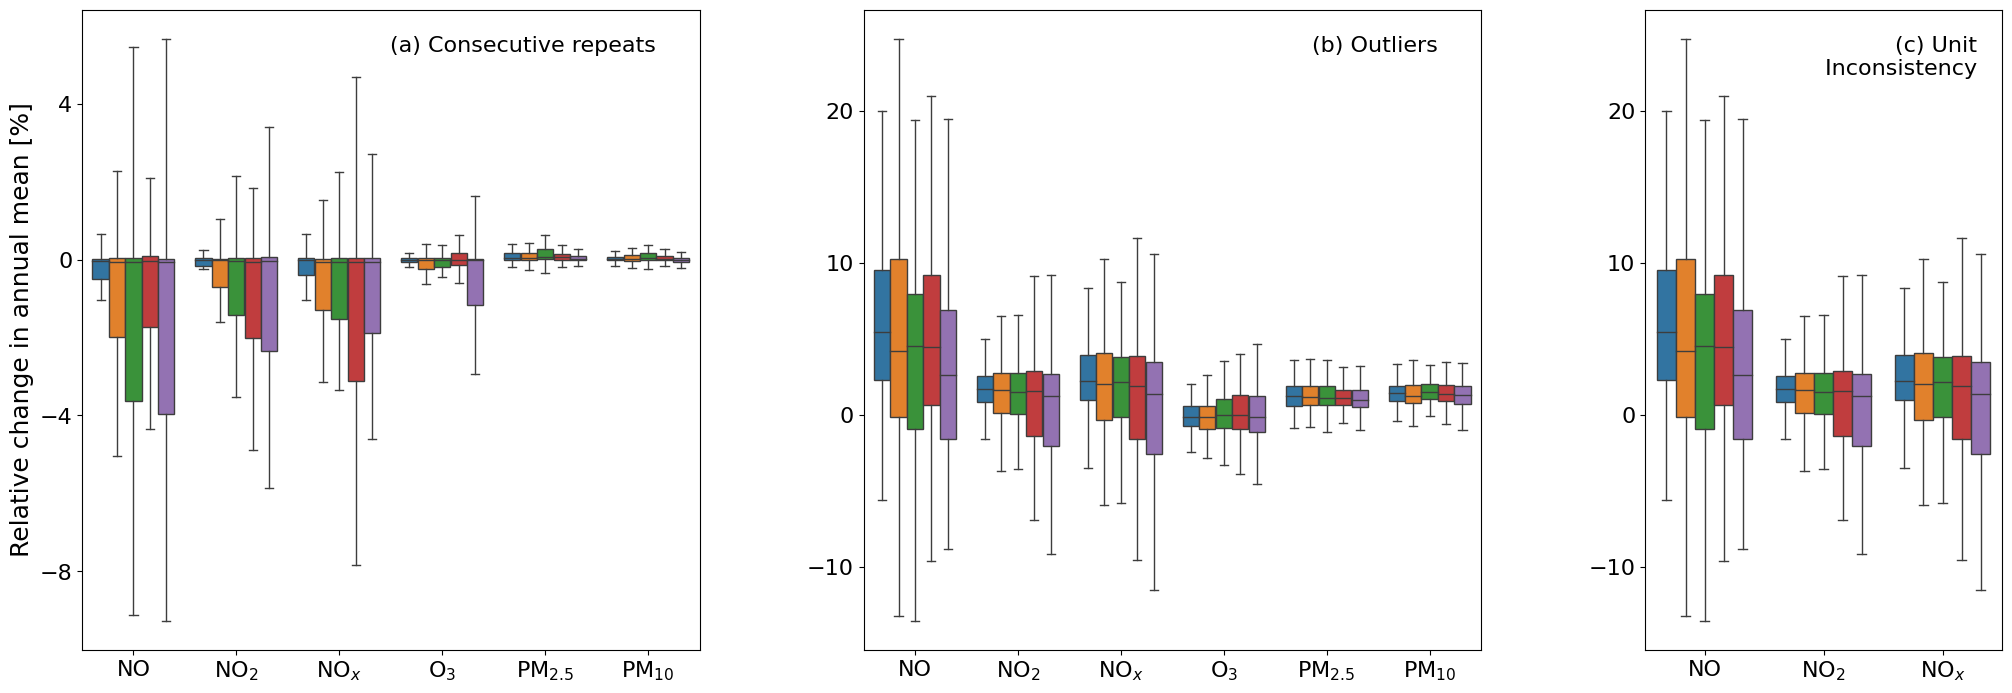

In [8]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(24,8))

gs = fig.add_gridspec(1,8)

ax3 = fig.add_subplot(gs[0:1, 0:3])
ax4 = fig.add_subplot(gs[0:1, 3:6])
ax5 = fig.add_subplot(gs[0:1, 6:8])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.2)


count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_all.csv")
t = count_var
df = count_var


lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
per_df = t
for name in lst:
    # t[name + '_consecutives'] = (t[name] - t[name+'_clean'])*100/t[name]
    # t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_clean'])*100/t[name+'_clean']
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)  
    t[name + '_consecutives'] = (t[name] - t[name + '_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name] - t[name+'_outliers'])*100/t[name]

    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name]-df[name + '_CPCB'])/df[name + '_outliers']*100

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )

ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax3.set_ylabel("Relative change in " + "\n"+"annual mean [%]")
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops )


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))




from matplotlib.patches import Rectangle


ax3.get_legend().remove()
ax4.get_legend().remove()


per_df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_all.csv")
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name] - per_df[name + '_outliers'])*100/per_df[name]
melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.boxplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)




ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax5.set_ylabel("Outliers [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)


ax5.get_legend().remove()
ax3.set_ylabel("Relative change in annual mean [%]", fontsize=18)
ax4.set_ylabel("")
ax5.set_ylabel("")


# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=1.7,
#                     hspace=0.18)

ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
# fig.suptitle('(B) With outliers ', fontsize=14)

#ax1.set_ylim([-2, 105])
# ax2.set_ylim([-2, 60])
# ax3.set_ylim([-85, 100])
# ax4.set_ylim([-60, 70])
# ax5.set_ylim([-50, 150])

plt.text(.93, .96, '(a) Consecutive repeats', ha='right', va='top', transform=ax3.transAxes,  backgroundcolor = 'none')
plt.text(.93, .96, '(b) Outliers', ha='right', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(.93, .96, '(c) Unit' + "\n" + ' Inconsistency', ha='right', va='top',transform=ax5.transAxes, backgroundcolor = 'none')
# plt.text(.03, .96, ' (f)', ha='left', va='top', transform=ax1.transAxes, backgroundcolor = 'white')
# plt.text(.03, .96, ' (g)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'white')

# ax3.set_ylabel("Relative change in" + "\n"+"annual mean [%]")

# fig.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\bar_plot_change_in_mean', dpi=1200, bbox_inches="tight")

plt.show()

### PLOT 3

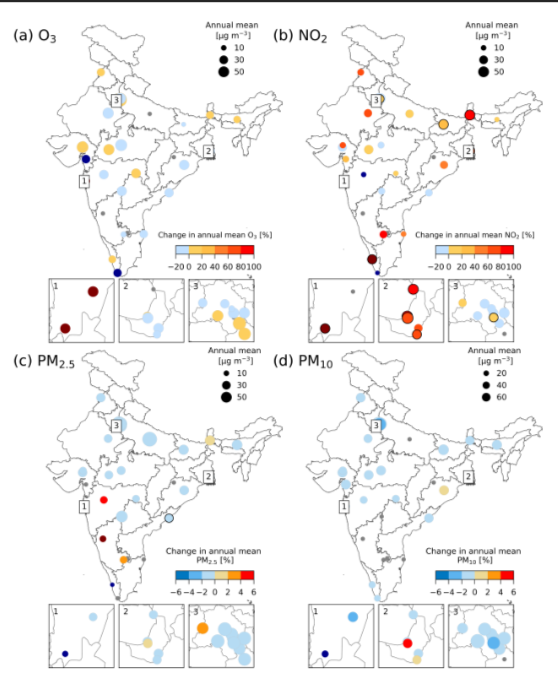 <br/>
Reproduce this plot

PLOTTING FOR:  2020 PM25
0    109
1      1
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 PM10
0    104
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 NO2
0    91
1    15
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 Ozone
0    103
1      2
Name: compliance_change, dtype: int64


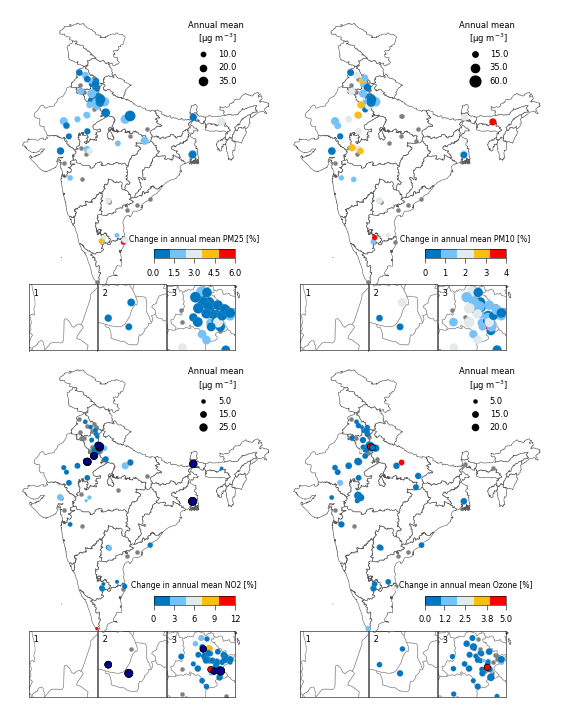

In [9]:
from plot_maps import create_map_plots
# years = [2019,2020,2021,2022,2023]
years = [2020]
for year in years:
    df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_all.csv")
    count_summary = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count_all.csv")

    sites_to_plot = pd.read_csv(r"CPCB_Issues\AirPy_v2\final_site_list.csv")

    df = df[df['site_id'].isin(sites_to_plot['site_id'])]
    create_map_plots(df, count_summary, year, ['PM25', 'PM10', 'NO2', 'Ozone'])

PLOTTING FOR:  2020 NO2
32
0    19
1    13
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 PM25
32
0    32
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 PM10
32
0    31
1     1
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 Ozone
32
0    31
1     1
Name: compliance_change, dtype: int64


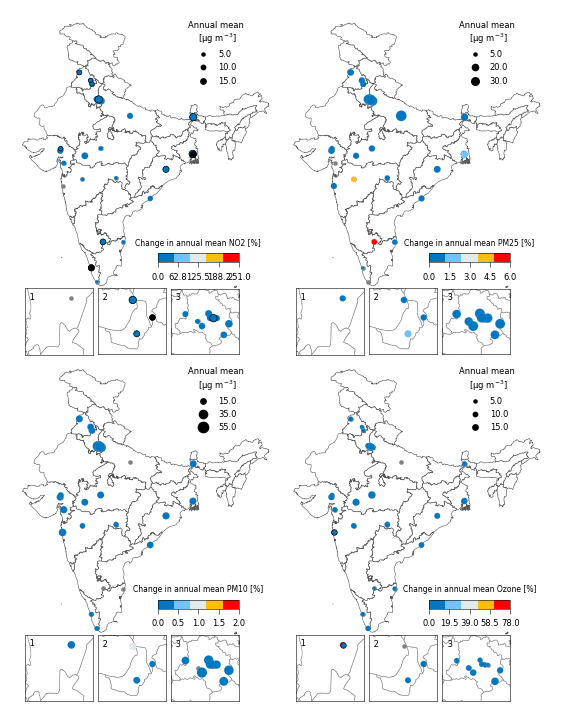

In [3]:
from plot_maps import create_map_plots
# years = [2019,2020,2021,2022,2023]
years = [2020]
for year in years:
    df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_all.csv")
    count_summary = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count_all.csv")
    sites_to_plot = pd.read_csv(r"C:\Users\hitan\OneDrive\Desktop\MiniProjects\ML_NMIMS Codes\CPCB_Issues\original_40_sites.csv")

    create_map_plots(df, count_summary, year, ['NO2', 'PM25', 'PM10', 'Ozone'], site_list=sites_to_plot)

In [ ]:
from plot_maps import create_map_plots
# years = [2019,2020,2021,2022,2023]
years = [2020]
for year in years:
    df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_all.csv")
    count_summary = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count_all.csv")

    sites_to_plot = pd.read_csv(r"CPCB_Issues\AirPy_v2\final_site_list.csv")

    df = df[df['site_id'].isin(sites_to_plot['site_id'])]
    create_map_plots(df, count_summary, year, ['PM25', 'PM10', 'NO2', 'Ozone'])